## Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pandas_profiling.utils.cache import cache_file
from pathlib import Path

import requests
import numpy as np
import pandas as pd

import pandas_profiling
from pandas_profiling import ProfileReport

C:\Users\public\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**<font color='blue'> Print the current working directory </font>**

In [2]:
os.getcwd()

'C:\\Users\\Jake Wojcik\\Documents\\Springboard\\DS Career Track Course\\Capstone_2\\Notebooks'

**<font color='blue'> Load the data into a pandas dataframe and print the first five rows of the dataframe. </font>**

In [3]:
df_combine = pd.read_excel(r'C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\Data\NFL_Combine_Data.xlsx',sheet_name='Combine Results')
df_combine.head()

,Year,Name,College,POS,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle
0,2018,Josh Adams,Notre Dame,RB,74.0,213,9.25,33.75,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1,2018,Ola Adeniyi,Toledo,DE,74.0,248,9.63,31.75,NaN,4.83,26.0,31.5,NaN,4.28,7.21,12.79
2,2018,Jordan Akins,Central Florida,TE,75.0,249,9.50,32.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,Jaire Alexander,Louisville,CB,71.0,192,NaN,NaN,NaN,4.38,14.0,35.0,127.0,3.98,6.71,NaN
4,2018,Austin Allen,Arkansas,QB,72.0,210,9.63,30.63,NaN,4.81,NaN,29.5,112.0,4.48,7.18,NaN


In [4]:
df_draft = pd.read_excel(r'C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\Data\NFL_Combine_Data.xlsx',sheet_name='nfl_draft')
df_draft.head()

,Unnamed: 0,Player_Id,Year,Rnd,Pick,Tm,Player,HOF,Pos,Position Standard,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 34
0,2015Jameis Winston,WinsJa00,2015,1,1,TAM,Jameis Winston,No,QB,QB,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN
1,2015Marcus Mariota,MariMa01,2015,1,2,TEN,Marcus Mariota,No,QB,QB,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN
2,2015Dante Fowler,FowlDa00,2015,1,3,JAX,Dante Fowler,No,OLB,LB,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,NaN
3,2015Amari Cooper,CoopAm00,2015,1,4,OAK,Amari Cooper,No,WR,WR,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN
4,2015Brandon Scherff,ScheBr00,2015,1,5,WAS,Brandon Scherff,No,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,NaN


### Merge Datasets


**<font color='blue'> Create column with year drafted followed by name. This is the column both datasets will be merged on. </font>**

In [5]:
#Unnamed: 0 column has year drafted followed by name.
#rename Unnamed: 0
df_draft = df_draft.rename(columns={'Unnamed: 0': 'Player_id'})
#Drop old player_id
df_draft = df_draft.drop('Player_Id', 1)


In [6]:
# create a column with the year as a string in order to create player_id column for df.
df_combine['year_string'] = df_combine.Year.astype(str)

In [7]:
#Create new column with distinct values for each player
df_combine['Player_id'] = df_combine.apply(lambda row: row.year_string + row.Name, axis=1)

In [8]:
#Merge dataframes on Player_id column
df = pd.merge(left=df_draft, right=df_combine, left_on='Player_id', right_on='Player_id')
df

,Player_id,Year_x,Rnd,Pick,Tm,Player,HOF,Pos,Position Standard,First4AV,...,Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle,year_string
0,2015Jameis Winston,2015,1,1,TAM,Jameis Winston,No,QB,QB,13,...,32.00,27.0,4.97,NaN,28.5,103.0,4.36,7.16,NaN,2015
1,2015Marcus Mariota,2015,1,2,TEN,Marcus Mariota,No,QB,QB,9,...,32.00,NaN,4.52,NaN,36.0,121.0,4.11,6.87,NaN,2015
2,2015Dante Fowler,2015,1,3,JAX,Dante Fowler,No,OLB,LB,0,...,33.75,16.0,4.60,19.0,32.5,112.0,4.32,7.40,11.89,2015
3,2015Amari Cooper,2015,1,4,OAK,Amari Cooper,No,WR,WR,9,...,31.50,21.0,4.42,NaN,33.0,120.0,3.98,6.71,NaN,2015
4,2015Brandon Scherff,2015,1,5,WAS,Brandon Scherff,No,T,T,7,...,33.38,NaN,5.05,23.0,NaN,NaN,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,1987Tyrone Sorrells,1987,12,319,NOR,Tyrone Sorrells,No,G,G,0,...,32.00,NaN,4.82,18.0,30.5,114.0,5.05,NaN,NaN,1987
5639,1987Tony Burse,1987,12,324,SEA,Tony Burse,No,RB,RB,0,...,30.50,NaN,4.71,20.0,27.5,104.0,4.88,NaN,12.37,1987
5640,1987Bruce Holmes,1987,12,325,KAN,Bruce Holmes,No,LB,LB,1,...,31.50,NaN,4.92,15.0,28.0,105.0,4.50,NaN,12.40,1987
5641,1987Bill Ransdell,1987,12,327,NYJ,Bill Ransdell,No,QB,QB,0,...,NaN,NaN,4.96,10.0,24.0,99.0,4.22,NaN,NaN,1987


## Data Organization

In [9]:
path = os.getcwd()

In [10]:
print ("The current working directory is %s" % path)

The current working directory is C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\Notebooks


### Create subfolders

In [11]:
#data = r"'C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\data"
#os.mkdir(data)


In [12]:
#figures = r"'C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\figures"
#os.mkdir(figures)

In [13]:
#models = r"'C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\models"
#os.mkdir(models)

In [14]:
os.listdir()

['.ipynb_checkpoints',
 'Combine_profile.html',
 'Draft_profile.html',
 'Merged Dataframe.html',
 'merged_df.csv',
 'merged_profile.html',
 'NFL Combine_Draft_data_wrangling.ipynb']

## Data Definition

In [15]:
#print the Shape of the Dataframe
df.shape

(5643, 51)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5643 entries, 0 to 5642
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player_id          5643 non-null   object 
 1   Year_x             5643 non-null   int64  
 2   Rnd                5643 non-null   int64  
 3   Pick               5643 non-null   int64  
 4   Tm                 5643 non-null   object 
 5   Player             5643 non-null   object 
 6   HOF                5643 non-null   object 
 7   Pos                5643 non-null   object 
 8   Position Standard  5643 non-null   object 
 9   First4AV           5643 non-null   int64  
 10  Age                5060 non-null   float64
 11  To                 4966 non-null   float64
 12  AP1                5643 non-null   int64  
 13  PB                 5643 non-null   int64  
 14  St                 5643 non-null   int64  
 15  CarAV              4966 non-null   float64
 16  DrAV               4524 

### Column Names

**<font color='blue'>Print the columns names of the entire dataframe </font>**

In [17]:
df.columns

Index(['Player_id', 'Year_x', 'Rnd', 'Pick', 'Tm', 'Player', 'HOF', 'Pos',
       'Position Standard', 'First4AV', 'Age', 'To', 'AP1', 'PB', 'St',
       'CarAV', 'DrAV', 'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk', 'College/Univ', 'Unnamed: 34',
       'Year_y', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       'Hand Size (in)', 'Arm Length (in)', 'Wonderlic', '40 Yard',
       'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone',
       '60Yd Shuttle', 'year_string'],
      dtype='object')

**<font color='blue'>Description of column names </font>**

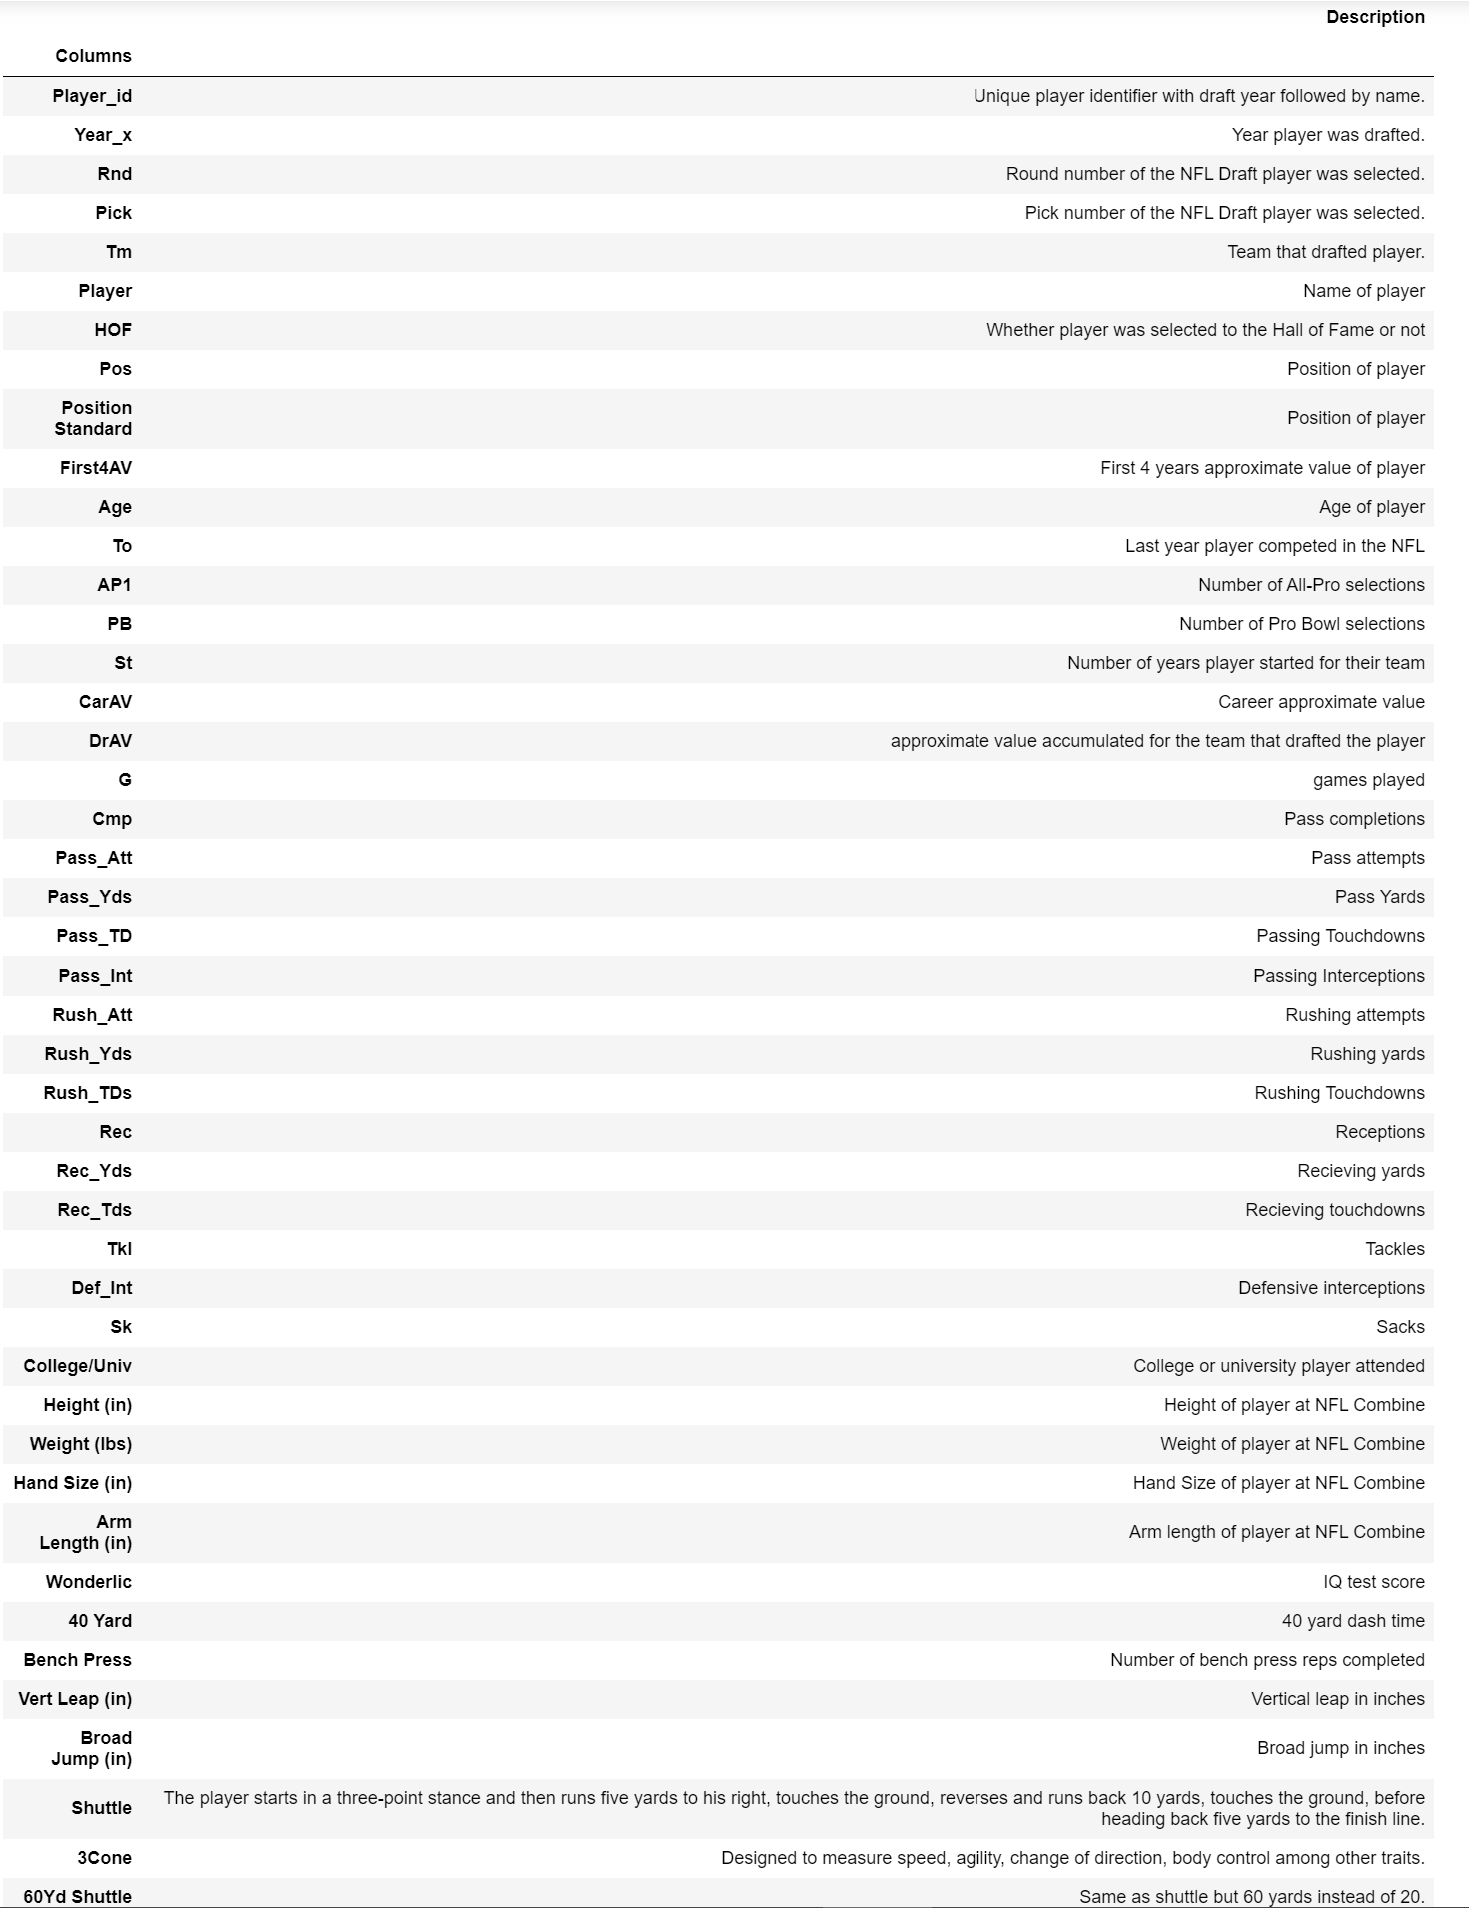

### Data Types

Review which columns are integer, float, categorical, or dates. Make sure the data type is loaded properly in the dataframe.

In [18]:
df.dtypes

Player_id             object
Year_x                 int64
Rnd                    int64
Pick                   int64
Tm                    object
Player                object
HOF                   object
Pos                   object
Position Standard     object
First4AV               int64
Age                  float64
To                   float64
AP1                    int64
PB                     int64
St                     int64
CarAV                float64
DrAV                 float64
G                    float64
Cmp                  float64
Pass_Att             float64
Pass_Yds             float64
Pass_TD              float64
Pass_Int             float64
Rush_Att             float64
Rush_Yds             float64
Rush_TDs             float64
Rec                  float64
Rec_Yds              float64
Rec_Tds              float64
Tkl                  float64
Def_Int              float64
Sk                    object
College/Univ          object
Unnamed: 34           object
Year_y        

### Count of unique values 

**<font color='blue'>Print the count of unique values for every column, regardless of data type.</font>**

In [19]:
df.nunique()

Player_id            5605
Year_x                 29
Rnd                    12
Pick                  333
Tm                     35
Player               5508
HOF                     1
Pos                    24
Position Standard      15
First4AV               80
Age                     9
To                     30
AP1                     8
PB                     15
St                     19
CarAV                 127
DrAV                  118
G                     244
Cmp                   190
Pass_Att              195
Pass_Yds              263
Pass_TD                99
Pass_Int               87
Rush_Att              414
Rush_Yds              609
Rush_TDs               66
Rec                   396
Rec_Yds               970
Rec_Tds                82
Tkl                   478
Def_Int               102
Sk                    348
College/Univ          261
Unnamed: 34             1
Year_y                 29
Name                 5508
College               310
POS                    18
Height (in) 

**<font color='blue'>Print the percent of unique values per column. Use the df.nunique and the size of the dataframe to calculate the percentages. </font>**

In [20]:
df.nunique()/5643

Player_id            0.993266
Year_x               0.005139
Rnd                  0.002127
Pick                 0.059011
Tm                   0.006202
Player               0.976077
HOF                  0.000177
Pos                  0.004253
Position Standard    0.002658
First4AV             0.014177
Age                  0.001595
To                   0.005316
AP1                  0.001418
PB                   0.002658
St                   0.003367
CarAV                0.022506
DrAV                 0.020911
G                    0.043239
Cmp                  0.033670
Pass_Att             0.034556
Pass_Yds             0.046606
Pass_TD              0.017544
Pass_Int             0.015417
Rush_Att             0.073365
Rush_Yds             0.107921
Rush_TDs             0.011696
Rec                  0.070175
Rec_Yds              0.171894
Rec_Tds              0.014531
Tkl                  0.084707
Def_Int              0.018075
Sk                   0.061669
College/Univ         0.046252
Unnamed: 3

**<font color='blue'> Determine Position nomenclature </font>**

In [21]:
df.POS.value_counts()

WR     723
CB     614
DE     497
OLB    492
OT     480
RB     471
DT     451
OG     336
TE     320
QB     283
ILB    231
FS     218
SS     186
C      157
FB     152
K       18
P       13
LS       1
Name: POS, dtype: int64

In [22]:
df['Position Standard'].value_counts()

DB    1021
LB     735
WR     717
RB     549
DE     491
DT     443
T      435
G      389
TE     342
QB     285
C      147
FB      58
K       17
P       13
LS       1
Name: Position Standard, dtype: int64

In [23]:
df.Pos.value_counts()

DB     983
WR     716
LB     703
RB     549
DE     488
T      428
DT     409
G      378
TE     342
QB     285
C      142
FB      58
NT      34
CB      26
OL      23
OLB     21
K       17
P       13
ILB     11
SS       7
FS       5
DL       3
KR       1
LS       1
Name: Pos, dtype: int64

**<font color='blue'> Determine any differences in year columns </font>**

In [24]:
df.Year_x.value_counts()

1992    264
1991    253
2015    234
2012    219
1987    204
1999    203
2014    202
1990    202
1988    202
2011    197
2010    196
2013    194
2006    191
1989    190
2005    189
2009    188
1993    187
1997    187
2001    187
2008    183
1996    183
2003    182
2007    178
1994    174
2002    174
2004    173
1995    173
1998    168
2000    166
Name: Year_x, dtype: int64

In [25]:
df.Year_y.value_counts()

1992    264
1991    253
2015    234
2012    219
1987    204
1999    203
2014    202
1990    202
1988    202
2011    197
2010    196
2013    194
2006    191
1989    190
2005    189
2009    188
1993    187
1997    187
2001    187
2008    183
1996    183
2003    182
2007    178
1994    174
2002    174
2004    173
1995    173
1998    168
2000    166
Name: Year_y, dtype: int64

**<font color='blue'>What's in the Unnamed: 34 Column? </font>**

In [26]:
df['Unnamed: 34'].value_counts()

College Stats    76
Name: Unnamed: 34, dtype: int64

**<font color='blue'> Find out why 'Sk' column is an object data type</font>**

In [27]:
df.Sk.value_counts()

1                    174
2                    100
3                     59
5                     39
Miami (FL)            37
                    ... 
139.5                  1
136.5                  1
SW Minnesota           1
Fort Hays St.          1
Angelo State (TX)      1
Name: Sk, Length: 348, dtype: int64

**<font color='blue'> Consider dropping 'HOF' column due to all being the same value </font>**

In [28]:
df.HOF.value_counts()

No    5643
Name: HOF, dtype: int64

### Summary Statistics


**<font color='blue'>Review the numeric dataset's summary statistics. </font>**

In [29]:
df.describe()

,Year_x,Rnd,Pick,First4AV,Age,To,AP1,PB,St,CarAV,...,Hand Size (in),Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle
count,5643.000000,5643.000000,5643.000000,5643.000000,5060.000000,4966.000000,5643.000000,5643.000000,5643.000000,4966.000000,...,4967.000000,4770.000000,282.000000,5170.000000,4061.000000,4739.000000,4640.000000,4212.000000,2647.000000,1846.000000
mean,2000.931419,4.339181,121.753854,11.175084,22.630632,2006.072292,0.079390,0.295587,2.048024,18.180226,...,9.540300,32.276589,24.375887,4.803445,20.427481,32.471133,112.999784,4.381296,7.307926,11.614919
std,8.597487,2.475789,76.926261,13.524926,0.843876,8.270564,0.464712,1.139270,3.036234,22.608154,...,0.633307,1.496391,7.705929,0.305714,6.601871,4.240643,9.387964,0.265893,0.430744,0.412814
min,1987.000000,1.000000,1.000000,-4.000000,20.000000,1987.000000,0.000000,0.000000,0.000000,-4.000000,...,7.130000,25.630000,4.000000,4.210000,1.000000,19.500000,7.000000,3.730000,6.440000,10.430000
25%,1993.000000,2.000000,57.000000,1.000000,22.000000,1999.000000,0.000000,0.000000,0.000000,2.000000,...,9.130000,31.250000,20.000000,4.560000,16.000000,29.500000,107.000000,4.180000,6.980000,11.330000
50%,2001.000000,4.000000,115.000000,5.000000,23.000000,2007.000000,0.000000,0.000000,0.000000,9.000000,...,9.500000,32.250000,24.500000,4.730000,20.000000,32.500000,114.000000,4.340000,7.220000,11.590000
75%,2009.000000,6.000000,180.000000,18.000000,23.000000,2014.000000,0.000000,0.000000,3.000000,27.000000,...,10.000000,33.250000,29.000000,5.030000,25.000000,35.500000,120.000000,4.560000,7.580000,11.877500
max,2015.000000,12.000000,336.000000,84.000000,28.000000,2016.000000,7.000000,14.000000,19.000000,177.000000,...,11.880000,38.500000,48.000000,5.770000,49.000000,46.000000,147.000000,5.400000,9.280000,13.380000


### Generate Profile Report

In [30]:
# Generate the Profiling Report
#profile_report = df.profile_report(html={'style': {'full_width': True}})
#profile_report.to_file("merged_profile.html")


### Range of values per column

**<font color='blue'>Print the range of values using the aggregate function. </font>**

In [31]:
num_df = df.agg([min,max]).T
num_df

,min,max
Player_id,1987Adrian White,2015Za'Darius Smith
Year_x,1987,2015
Rnd,1,12
Pick,1,336
Tm,ARI,WAS
Player,A.J. Cann,Zeno Alexander
HOF,No,No
Pos,C,WR
Position Standard,C,WR
First4AV,-4,84


# Data Cleaning

### Look for Duplicates

**<font color='blue'>Drop duplicates due to wrong data found during the merge. Only 38 values were dropped or .67% of dataset. </font>**

In [32]:
duplicateDFRow = df[df.duplicated(['Player_id'])]
df.drop_duplicates(subset="Player_id")

,Player_id,Year_x,Rnd,Pick,Tm,Player,HOF,Pos,Position Standard,First4AV,...,Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle,year_string
0,2015Jameis Winston,2015,1,1,TAM,Jameis Winston,No,QB,QB,13,...,32.00,27.0,4.97,NaN,28.5,103.0,4.36,7.16,NaN,2015
1,2015Marcus Mariota,2015,1,2,TEN,Marcus Mariota,No,QB,QB,9,...,32.00,NaN,4.52,NaN,36.0,121.0,4.11,6.87,NaN,2015
2,2015Dante Fowler,2015,1,3,JAX,Dante Fowler,No,OLB,LB,0,...,33.75,16.0,4.60,19.0,32.5,112.0,4.32,7.40,11.89,2015
3,2015Amari Cooper,2015,1,4,OAK,Amari Cooper,No,WR,WR,9,...,31.50,21.0,4.42,NaN,33.0,120.0,3.98,6.71,NaN,2015
4,2015Brandon Scherff,2015,1,5,WAS,Brandon Scherff,No,T,T,7,...,33.38,NaN,5.05,23.0,NaN,NaN,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,1987Tyrone Sorrells,1987,12,319,NOR,Tyrone Sorrells,No,G,G,0,...,32.00,NaN,4.82,18.0,30.5,114.0,5.05,NaN,NaN,1987
5639,1987Tony Burse,1987,12,324,SEA,Tony Burse,No,RB,RB,0,...,30.50,NaN,4.71,20.0,27.5,104.0,4.88,NaN,12.37,1987
5640,1987Bruce Holmes,1987,12,325,KAN,Bruce Holmes,No,LB,LB,1,...,31.50,NaN,4.92,15.0,28.0,105.0,4.50,NaN,12.40,1987
5641,1987Bill Ransdell,1987,12,327,NYJ,Bill Ransdell,No,QB,QB,0,...,NaN,NaN,4.96,10.0,24.0,99.0,4.22,NaN,NaN,1987


### Drop Duplicate & Unnecessary Columns 

In [33]:
#Drop duplicate columns
df = df.drop(['Year_y','year_string','POS','Pos','College/Univ','Name'] ,axis=1)

In [34]:
#Drop Unnamed: 34 since it doesn't have any relevant information
df = df.drop('Unnamed: 34',axis=1)

In [35]:
#Drop HOF column since all values are 'no'. This is incorrect.There are Hall of Fame players in this dataset
df = df.drop('HOF',axis=1)

In [36]:
#Replace all non int values for the 'Sk' column 
df['Sk'] = pd.to_numeric(df.Sk.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(float)
#Replace zeros to NaN
df.Sk.replace(0, np.nan, inplace=True)

In [37]:
#Rename Year_x to Draft_year
df.rename(columns={'Year_x': 'Draft_Year',}, inplace=True)


### Handle missing and NA values
Due to the unique nature of the dataset, I'm going to wait until the exploratory data anaysis section to determine how to fill the multiple Na values in the stats and combine metrics columns.

In [38]:
#Replace 'Age' column with mean Age
df['Age'].fillna((df['Age'].mean()), inplace=True)
#Convert 'Age' to int
df['Age'] = df.Age.astype(int)

In [39]:
#Convert 'To' column to int and replace Na values to Draft_year
df['To'].fillna((df['Draft_Year']),inplace=True)
df['To'] = df.To.astype(int)

# Export Data to new .csv File


In [40]:
df.to_csv(r'C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\Data\clean_df.csv')